In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


# **Import Necessary Modules**

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Load the Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Normalizing the Data in range of 0-1

In [4]:
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Building ANN (Artificial Neural Network)

In [5]:
model = Sequential()

model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.40))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.40))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.50))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

## Compiling the Model

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Callback - Earlystopping

In [8]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

## Training the Model

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=150, callbacks=callback)

Epoch 1/1000
320/320 [==============================] - 6s 15ms/step - loss: 0.5098 - accuracy: 0.8463 - val_loss: 0.1556 - val_accuracy: 0.9538
Epoch 2/1000
320/320 [==============================] - 5s 15ms/step - loss: 0.2087 - accuracy: 0.9407 - val_loss: 0.1106 - val_accuracy: 0.9688
Epoch 3/1000
320/320 [==============================] - 5s 15ms/step - loss: 0.1577 - accuracy: 0.9556 - val_loss: 0.0978 - val_accuracy: 0.9720
Epoch 4/1000
320/320 [==============================] - 5s 14ms/step - loss: 0.1345 - accuracy: 0.9626 - val_loss: 0.0937 - val_accuracy: 0.9746
Epoch 5/1000
320/320 [==============================] - 4s 14ms/step - loss: 0.1164 - accuracy: 0.9671 - val_loss: 0.0838 - val_accuracy: 0.9768
Epoch 6/1000
320/320 [==============================] - 5s 14ms/step - loss: 0.1024 - accuracy: 0.9715 - val_loss: 0.0805 - val_accuracy: 0.9775
Epoch 7/1000
320/320 [==============================] - 5s 14ms/step - loss: 0.0925 - accuracy: 0.9740 - val_loss: 0.0763 - val_ac

## Testing the Model

In [10]:
y_pred = model.predict(X_test)
y_pred_label = y_pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9822


[0.06998655945062637, 0.982200026512146]

## Plot is representing that approximately after 0.1** loss again tends to increase 
and the difference between both plots representing that model is overfitting

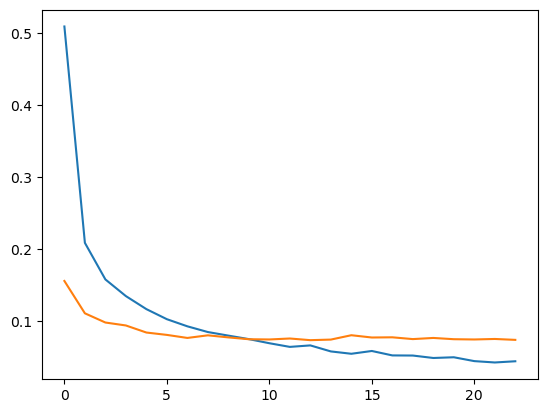

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

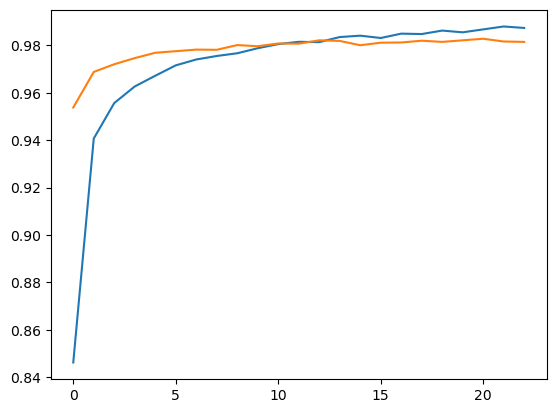

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Correct Predcition

In [14]:
y_train = np.argmax(y_train, axis=1)

In [15]:
y_test = np.argmax(y_test, axis=1)

# Wrong Predictions 

In [16]:
error_ind = []
error_img = []
for i, x in enumerate(y_test):
    if y_test[i] != y_pred_label[i]:
        error_ind.append(i)
        error_img.append(X_test[i, :].reshape(28, 28))

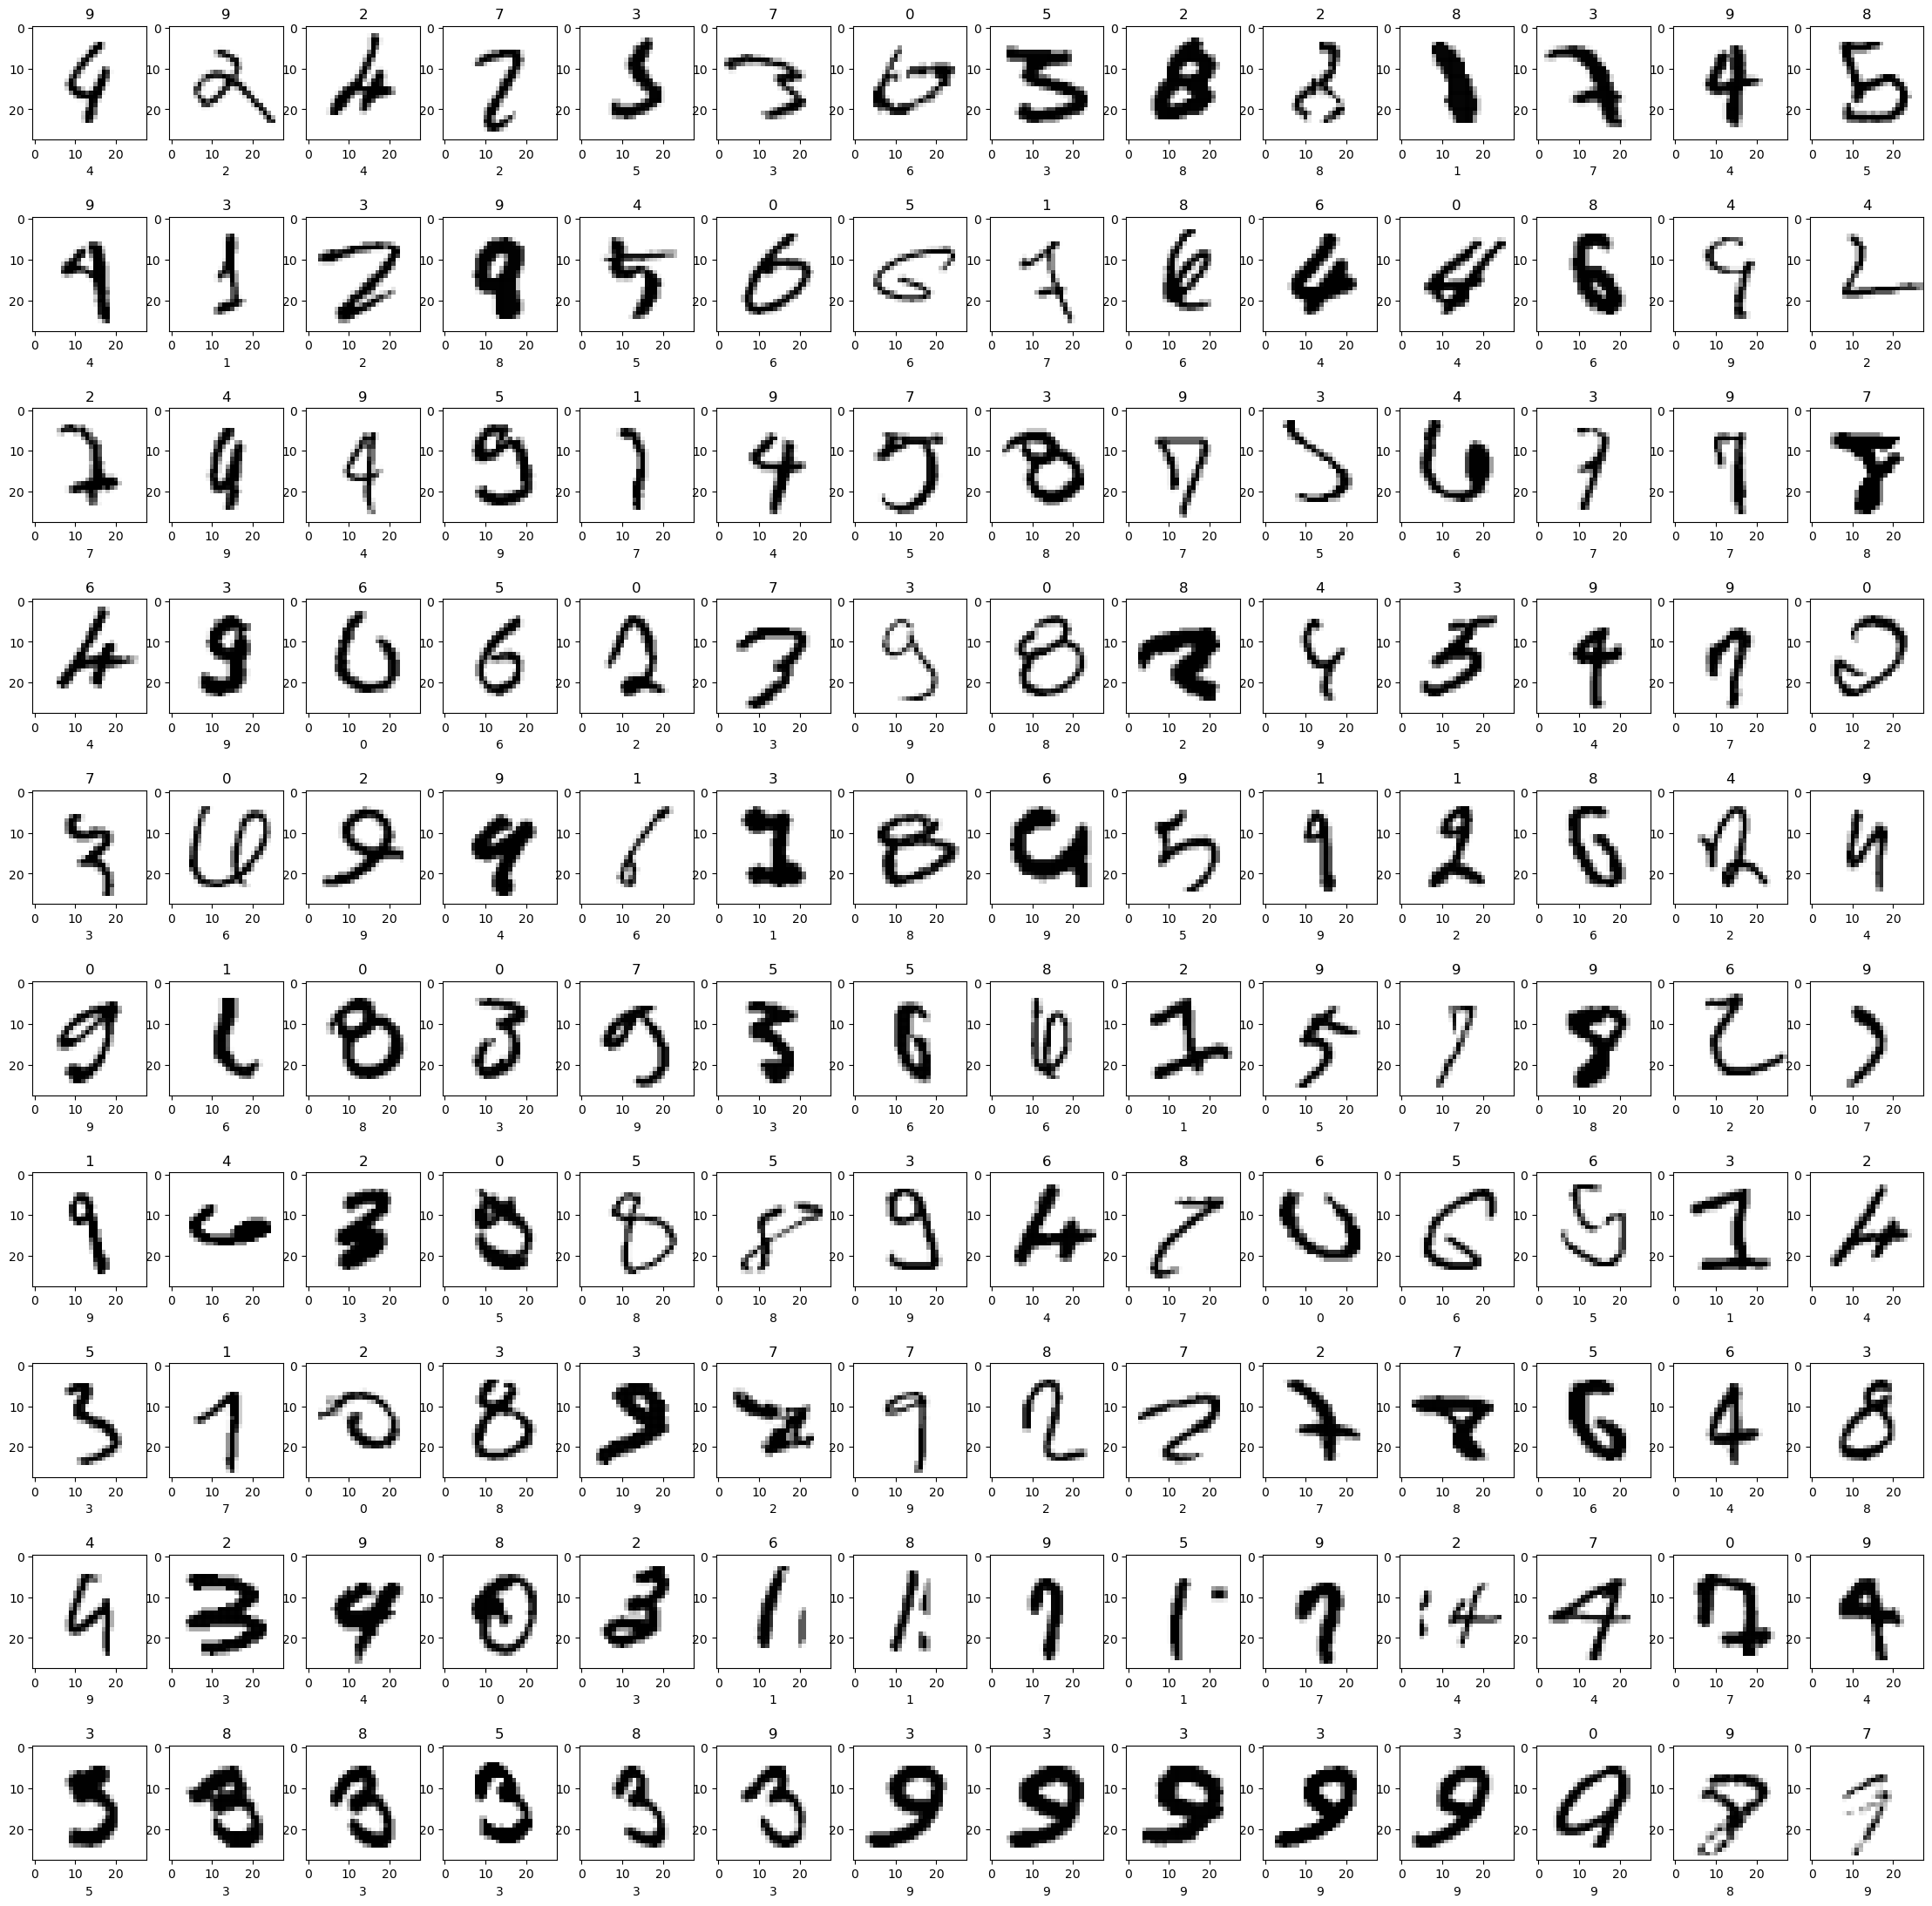

In [17]:
plt.figure(figsize=(28,28))
for i in range(0, 140):
    plt.subplot(10, 14, i+1)
    plt.xlabel(y_test[error_ind[i]])
    plt.imshow(error_img[i], cmap="gray_r")
    plt.title(y_pred_label[error_ind[i]])